In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc, f1_score
from sklearn.metrics import roc_curve, auc, f1_score
from datetime import datetime
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
d_f = pd.read_csv('data/raw/census_income.csv')
d_f.shape

(32561, 18)

In [3]:
df = pd.read_csv('data/raw/raw_data_for_pipeline_v2.csv').drop_duplicates(keep=False)
df.shape

(32188, 17)

In [4]:
le = LabelEncoder()
column_for_label = ['sex','race','marital_status','relationship','education','workclass',
                    'occupation','country_name']
for c in column_for_label:
    df[c] = le.fit_transform(df[c]) # transorming feature
df.head(3)

,age,sex,race,marital_status,relationship_label,relationship,functional_weight,education,education_num,workclass,occupation,capital_gain,capital_loss,hours_per_week,native_country,country_name,target
0,66,1,4,2,0,0,36364,11,9,2,3,0,2267,40,39,39,0
1,32,1,4,4,1,1,142675,11,9,4,3,0,0,40,39,39,0
2,28,0,2,4,1,1,161087,15,10,4,4,0,0,45,23,23,0


In [5]:
columns_to_drop = ['relationship_label', 'education_num','native_country']
df.drop(columns_to_drop, axis = 1, inplace = True)
df.head(1)

,age,sex,race,marital_status,relationship,functional_weight,education,workclass,occupation,capital_gain,capital_loss,hours_per_week,country_name,target
0,66,1,4,2,0,36364,11,2,3,0,2267,40,39,0


In [6]:
data_features_rs = df.iloc[:, : ]

scaler = RobustScaler()
scaled_df = pd.DataFrame(
    data=scaler.fit_transform(data_features_rs), 
    columns=data_features_rs.columns
)

In [7]:
sc_1 = scaled_df[scaled_df['target'] == 1]
sc_1.shape

(7764, 14)

In [8]:
sc_0 = scaled_df[scaled_df['target'] == 0].iloc[:7764]
sc_0.head(1)

,age,sex,race,marital_status,relationship,functional_weight,education,workclass,occupation,capital_gain,capital_loss,hours_per_week,country_name,target
0,1.45,0.0,0.0,0.0,-0.333333,-1.191587,0.0,-2.0,-0.571429,0.0,2267.0,0.0,0.0,0.0


In [9]:
sc_df = pd.concat([sc_1, sc_0], axis = 0,).reset_index(drop = True)
sc_df.shape

(15528, 14)

In [10]:
delta = pd.concat([scaled_df, sc_df]).drop_duplicates(keep=False).reset_index(drop = True)
delta.target.value_counts()

0.0    16660
Name: target, dtype: int64

In [11]:
X_df = sc_df.drop(['target'], axis = 1)
y_df = sc_df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df,
    y_df,
    test_size=0.20,
    random_state=42)
y_train.value_counts()

0.0    6220
1.0    6202
Name: target, dtype: int64

In [13]:
y_train.head(10)

14586    0.0
10094    0.0
6196     1.0
12474    0.0
10417    0.0
7388     1.0
11643    0.0
4828     1.0
10118    0.0
7528     1.0
Name: target, dtype: float64

In [14]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier(learning_rate=1.7, n_estimators=210)
clf_bagging = BaggingClassifier()
clf_xgb = XGBClassifier()

In [15]:
models_new = {clf_xgb: 'XGBoost',        
              clf_ada: 'AdaBoostClassifier',
              clf_forest: 'RandomForestClassifier',}

classifiers_new = models_new.values()

+++++++++++++++++++++++  XGBoost  ++++++++++++++++++++ :
 - accuracy_score:  0.843
 - f1_score:  0.848
----------------------------
 - ROC AUC _score:  0.925
----------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      1544
         1.0       0.82      0.87      0.85      1562

    accuracy                           0.84      3106
   macro avg       0.84      0.84      0.84      3106
weighted avg       0.84      0.84      0.84      3106



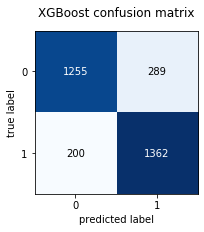

+++++++++++++++++++++++  AdaBoostClassifier  ++++++++++++++++++++ :
 - accuracy_score:  0.846
 - f1_score:  0.849
----------------------------
 - ROC AUC _score:  0.927
----------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1544
         1.0       0.84      0.86      0.85      1562

    accuracy                           0.85      3106
   macro avg       0.85      0.85      0.85      3106
weighted avg       0.85      0.85      0.85      3106



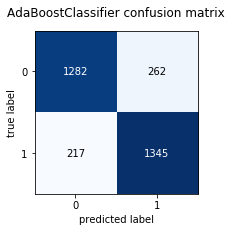

+++++++++++++++++++++++  RandomForestClassifier  ++++++++++++++++++++ :
 - accuracy_score:  0.812
 - f1_score:  0.811
----------------------------
 - ROC AUC _score:  0.894
----------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      1544
         1.0       0.82      0.80      0.81      1562

    accuracy                           0.81      3106
   macro avg       0.81      0.81      0.81      3106
weighted avg       0.81      0.81      0.81      3106



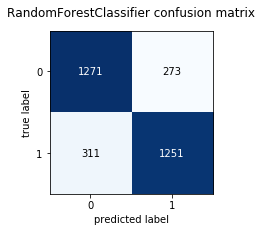

In [16]:
mean_score = []
std_score = []
time_best_model_fit = []

for model,value in models_new.items():
        
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # calculate the AUC
    y_pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    print(f"+++++++++++++++++++++++  {value}  ++++++++++++++++++++ :")    
    print(f" - accuracy_score: {accuracy_score(y_test, y_pred): .3f}")
    print(f" - f1_score: {f1_score(y_test, y_pred): .3f}")
    print('----------------------------')
    print(f" - ROC AUC _score: {roc_auc: .3f}")
    print('----------------------------')
    print(classification_report(y_test, y_pred))
    
    CM = confusion_matrix(y_test, y_pred)
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(3, 3))
    plt.title(f'{value} confusion matrix')
    plt.show()
    
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1] 
#     plt.figure(figsize=(10,6))
#     plt.barh(X_train.columns[indices], importances[indices])
#     plt.title(f'{value} Feature Importances')
#     plt.show()

    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    mean_score.append(scores.mean())
    std_score.append(scores.std())
    time_best_model_fit.append(elapsed_time)

In [17]:
cross_val_best_models = pd.DataFrame(mean_score, index = classifiers_new,
            columns = ['Accuracy Score', ]).round(3)
cross_val_best_models['STD of Accuracy'] = std_score
cross_val_best_models['Time to Fit'] = time_best_model_fit
cross_val_best_models.sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score,STD of Accuracy,Time to Fit
AdaBoostClassifier,0.836,0.008699,00:00:12.708354
XGBoost,0.832,0.011939,00:00:08.941693
RandomForestClassifier,0.810,0.008969,00:00:00.952677


In [18]:
X_train, X_test_sc, y_train, y_test_sc = train_test_split(
    X_df,
    y_df,
    test_size=0.20,
    random_state=42)
y_train.value_counts()

0.0    6220
1.0    6202
Name: target, dtype: int64

In [19]:
X_delta = delta.drop(['target'], axis = 1)
y_delta = delta['target']

In [20]:
X_test = pd.concat([X_test_sc, X_delta], axis = 0,).reset_index(drop = True)
X_test.shape, X_test_sc.shape, X_delta.shape,  X_train.shape

((19766, 13), (3106, 13), (16660, 13), (12422, 13))

In [21]:
y_test = pd.concat([y_test_sc, y_delta], axis = 0,).reset_index(drop = True)
y_test.value_counts()

0.0    18204
1.0     1562
Name: target, dtype: int64

+++++++++++++++++++++++  XGBoost  ++++++++++++++++++++ :
 - accuracy_score:  0.804
 - f1_score:  0.413
----------------------------
 - ROC AUC _score:  0.921
----------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88     18204
         1.0       0.27      0.87      0.41      1562

    accuracy                           0.80     19766
   macro avg       0.63      0.84      0.65     19766
weighted avg       0.93      0.80      0.85     19766



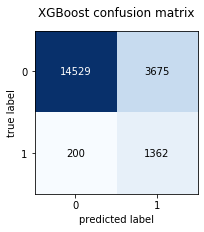

+++++++++++++++++++++++  AdaBoostClassifier  ++++++++++++++++++++ :
 - accuracy_score:  0.822
 - f1_score:  0.434
----------------------------
 - ROC AUC _score:  0.924
----------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.89     18204
         1.0       0.29      0.86      0.43      1562

    accuracy                           0.82     19766
   macro avg       0.64      0.84      0.66     19766
weighted avg       0.93      0.82      0.86     19766



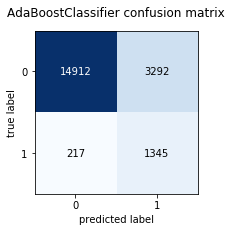

+++++++++++++++++++++++  RandomForestClassifier  ++++++++++++++++++++ :
 - accuracy_score:  0.818
 - f1_score:  0.410
----------------------------
 - ROC AUC _score:  0.891
----------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89     18204
         1.0       0.28      0.80      0.41      1562

    accuracy                           0.82     19766
   macro avg       0.63      0.81      0.65     19766
weighted avg       0.92      0.82      0.85     19766



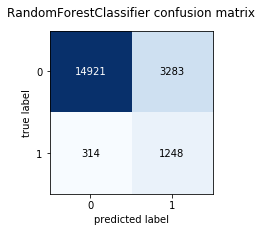

In [22]:
mean_score = []
std_score = []
time_best_model_fit = []

for model,value in models_new.items():
        
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # calculate the AUC
    y_pred_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    print(f"+++++++++++++++++++++++  {value}  ++++++++++++++++++++ :")    
    print(f" - accuracy_score: {accuracy_score(y_test, y_pred): .3f}")
    print(f" - f1_score: {f1_score(y_test, y_pred): .3f}")
    print('----------------------------')
    print(f" - ROC AUC _score: {roc_auc: .3f}")
    print('----------------------------')
    print(classification_report(y_test, y_pred))
    
    CM = confusion_matrix(y_test, y_pred)
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(3, 3))
    plt.title(f'{value} confusion matrix')
    plt.show()
    
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1] 
#     plt.figure(figsize=(10,6))
#     plt.barh(X_train.columns[indices], importances[indices])
#     plt.title(f'{value} Feature Importances')
#     plt.show()

    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    mean_score.append(scores.mean())
    std_score.append(scores.std())
    time_best_model_fit.append(elapsed_time)

In [23]:
cross_val_best_models = pd.DataFrame(mean_score, index = classifiers_new,
            columns = ['Accuracy Score', ]).round(3)
cross_val_best_models['STD of Accuracy'] = std_score
cross_val_best_models['Time to Fit'] = time_best_model_fit
cross_val_best_models.sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score,STD of Accuracy,Time to Fit
AdaBoostClassifier,0.836,0.008699,00:00:13.369206
XGBoost,0.832,0.011939,00:00:08.739440
RandomForestClassifier,0.806,0.008259,00:00:00.935933
